## Exercise 1

In [124]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py", "thinkdsp.py")

In [125]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, Wave, zero_pad
import scipy.signal
import pandas as pd
PI2 = np.pi * 2

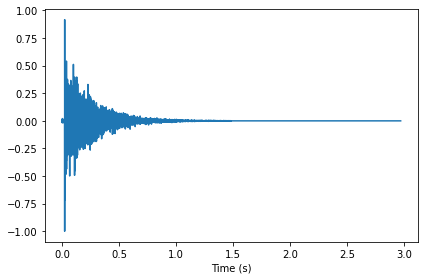

In [126]:
from thinkdsp import read_wave

response = read_wave('Sounds/180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

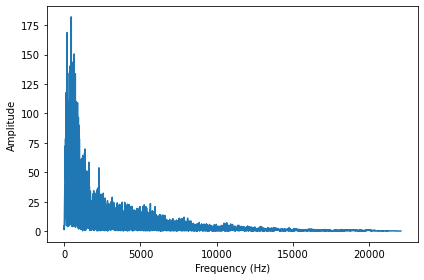

In [127]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

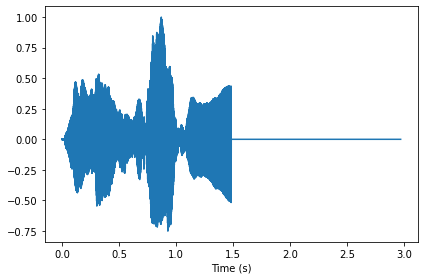

In [128]:
violin = read_wave('Sounds/92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

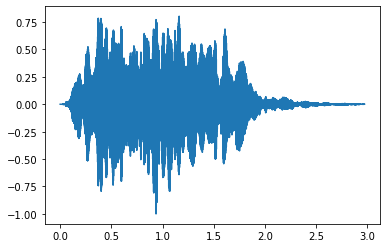

In [129]:
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

## Exercise 2

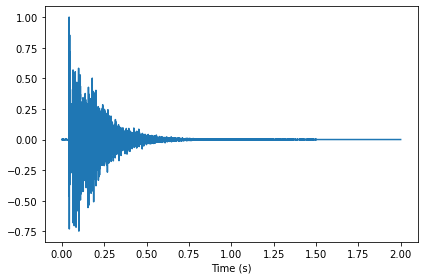

In [130]:
response = read_wave('Sounds/ir_row_1l_sl_centre.wav')

start = 0
duration = 2
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

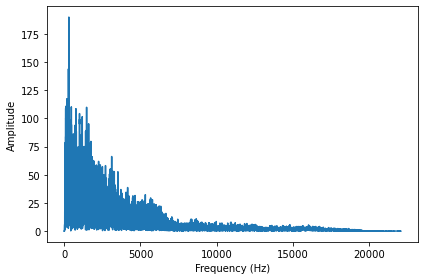

In [131]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

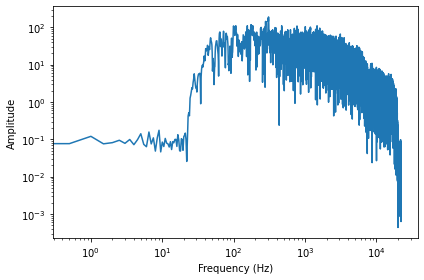

In [132]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

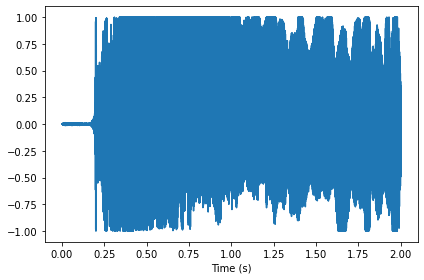

In [133]:
wave = read_wave('Sounds/132106__sironboy__woman-scream.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [134]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)

(44101, 44101)

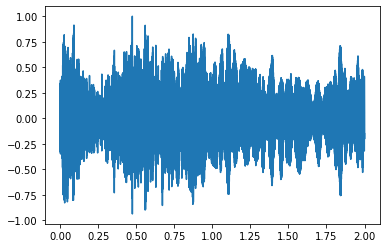

In [135]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

In [136]:
output.make_audio()

In [ ]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()
